<a href="https://colab.research.google.com/github/yuningrumzattayu/Study-Machine-Learning/blob/main/Analisis_Sentiment_PSN_Food_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Akhir**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import classification_report, confusion_matrix

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

import csv
import requests
from io import StringIO
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Data Loading

In [ ]:
# Membaca dataset
data_sentiment_df = pd.read_csv('/content/drive/My Drive/Colab/data-penelitian/food-estate-new.csv')

In [ ]:
# Melihat 5 baris pertama dari dataset
data_sentiment_df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1821895455531540650,Fri Aug 09 23:51:15 +0000 2024,0,@Rachel_Lonie Jgn bikin orang susah katanya......,1822058091996967289,NaN,Rachel_Lonie,in,NaN,0,0,0,https://x.com/NaufalAriiq26/status/18220580919...,1504597146284478464,NaufalAriiq26
1,1821558851285750156,Fri Aug 09 13:10:02 +0000 2024,2,@hidahidaan Mbok ya anda itu jangan asal cuap ...,1821896724165853386,NaN,hidahidaan,in,bandung,0,0,0,https://x.com/abi_daawud/status/18218967241658...,945784868,abi_daawud
2,1821524573743153378,Fri Aug 09 12:58:54 +0000 2024,0,@erlanishere halo siri apa relasi food estate ...,1821893921838133439,NaN,erlanishere,in,solo,0,0,0,https://x.com/disor_/status/1821893921838133439,708514669,disor_
3,1821885925619905007,Fri Aug 09 12:27:08 +0000 2024,0,Tingkatkan Minat Baca Bhabinkamtibmas Food Est...,1821885925619905007,https://pbs.twimg.com/media/GUijlpQa8AA-Klp.jpg,NaN,in,"Kalimantan Tengah, Indonesia",0,0,0,https://x.com/aping_wae/status/182188592561990...,1613072620777529344,aping_wae
4,1821400394721116280,Fri Aug 09 11:47:37 +0000 2024,0,@SahalaO82038 @BANGSAygSUJUD @prabowo @99propa...,1821875983676535178,NaN,SahalaO82038,in,NaN,0,1,0,https://x.com/DarekaRendy/status/1821875983676...,1610218742411325440,DarekaRendy


In [ ]:
data_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5530 entries, 0 to 5529
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      5530 non-null   int64 
 1   created_at               5530 non-null   object
 2   favorite_count           5530 non-null   int64 
 3   full_text                5530 non-null   object
 4   id_str                   5530 non-null   int64 
 5   image_url                655 non-null    object
 6   in_reply_to_screen_name  4085 non-null   object
 7   lang                     5530 non-null   object
 8   location                 2614 non-null   object
 9   quote_count              5530 non-null   int64 
 10  reply_count              5530 non-null   int64 
 11  retweet_count            5530 non-null   int64 
 12  tweet_url                5530 non-null   object
 13  user_id_str              5530 non-null   int64 
 14  username                 5530 non-null  

In [ ]:
data_sentiment_df = data_sentiment_df[['full_text', 'username', 'created_at']]
data_sentiment_df

,full_text,username,created_at
0,@Rachel_Lonie Jgn bikin orang susah katanya......,NaufalAriiq26,Fri Aug 09 23:51:15 +0000 2024
1,@hidahidaan Mbok ya anda itu jangan asal cuap ...,abi_daawud,Fri Aug 09 13:10:02 +0000 2024
2,@erlanishere halo siri apa relasi food estate ...,disor_,Fri Aug 09 12:58:54 +0000 2024
3,Tingkatkan Minat Baca Bhabinkamtibmas Food Est...,aping_wae,Fri Aug 09 12:27:08 +0000 2024
4,@SahalaO82038 @BANGSAygSUJUD @prabowo @99propa...,DarekaRendy,Fri Aug 09 11:47:37 +0000 2024
...,...,...,...
5525,@tanyarlfes ya bisa bisa aja tpi minimal akses...,baxxxoxxxapi___,Sat Mar 02 07:05:35 +0000 2024
5526,@matchaacheese_2 @ikbal_fari34568 @Kacaback678...,LFHLEON,Sat Mar 02 07:04:20 +0000 2024
5527,@tvOneNews @AgusYudhoyono ok saya dukung tapi ...,sabang_marouke,Sat Mar 02 07:00:03 +0000 2024
5528,@mas2_jawa_ @ARSIPAJA Ga bisa lah bang. Soalny...,blvdhc__,Sat Mar 02 06:54:03 +0000 2024


In [ ]:
# Menghapus duplikasi baris berdasarkan kolom 'full_text'
data_sentiment_df = data_sentiment_df.drop_duplicates(subset=['full_text'])

In [ ]:
# Menghitung jumlah baris duplikat dalam DataFrame setelah menghapus duplikat
print("Number of duplicates after first drop:", data_sentiment_df.duplicated().sum())

Number of duplicates after first drop: 0


In [ ]:
# Menghapus baris yang mengandung nilai NaN
data_sentiment_df  = data_sentiment_df.dropna()

In [ ]:
# Menampilkan ukuran dataframe setelah menghapus duplikat dan membersihkan data
print("Final shape:", data_sentiment_df.shape)

Final shape: (5518, 3)


### Cleaning Text

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # Menghapus RT
    text = re.sub(r"http\S+", '', text) # Menghapus link
    text = re.sub(r'[0-9]+', '', text) # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # Menghapuskarakter selain huruf dan angka

    text = text.replace('\n', ' ') # Menghapus baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapussemua tanda baca
    text = text.strip(' ') # Menghapus karakter spasi dari kiri dan kanan teks
    return text

In [ ]:
# Membersihkan teks pada kolom 'full_text'
data_sentiment_df['full_text'] = data_sentiment_df['full_text'].apply(cleaningText)

In [ ]:
# Menghapus duplikasi baris berdasarkan kolom 'full_text' setelah pembersihan
data_sentiment_df = data_sentiment_df.drop_duplicates(subset=['full_text'])

In [ ]:
# Menampilkan ukuran dataframe setelah menghapus duplikat dan membersihkan data
print("Final shape:", data_sentiment_df.shape)

Final shape: (5413, 3)


In [ ]:
data_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5413 entries, 0 to 5529
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_text   5413 non-null   object
 1   username    5413 non-null   object
 2   created_at  5413 non-null   object
dtypes: object(3)
memory usage: 169.2+ KB


### Case Folding

In [ ]:
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

### Tokenizing

In [ ]:
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

### Stopword Removal

In [ ]:
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

### Stemming

In [ ]:
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords =  {"@" : "di", "klo" : "kalau", "mbok" : "seharusnya", "achieveable" : "dapat dicapai", "kacau" : "berantakan", "awokawok" : "tertawa", "wkwkwk" : "tertawa", "dsb" : "dan sebagainya", "pdhl" : "padahal", "dst" : "dan seterusnya", "bpk" : "badan pemeriksa keuangan", "kementan" : "kementerian pertanian", "kemenhan" : "kementerian pertahanan", "qta" : "kita", "syl" : "syahrul yasin limpo", "utk" : "untuk", "dpr" : "dewan perwakilan rakyat", "kpk" : "komisi pemberantasan korupsi", "rp" : "rupiah", "ky" : "seperti", "hrs" : "harus", "yg" : "yang", "swaswbada" : "swasembada", "bisa" : "bisa", "sndiri" : "sendiri", "smp" : "sampai", "disn" : "disana", "jangan" : "tidak", "nggak" : "tidak", "gasi" : "tidak ya", "knapa" : "kenapa", "stlh" : "setelah", "bhkn" : "bahkan", "sblm" : "sebelum", "pilpres" : "pemilihan presiden", "gak" : "tidak", "tdk" : "tidak", "jg" : "juga", "kongkalikong" : "tidak jujur", "korup" : "korupsi", "dg" : "dengan", "capres" : "calon presiden", "hrsnya" : "seharusnya", "knp" : "kenapa", "ilang" : "hilang", "tp" : "tetapi", "orkay" : "orang kaya", "brp" : "berapa", "jd" : "menjadi", "dll" : "dan lain-lain", "pd" : "pada", "wtp" : "wajar tanpa pengecualian", "dpt" : "dapat", "massive" : "besar sekali", "boroknya" : "buruknya", "ngak" : "tidak", "dr" : "dari", "bagi" : "bagi", "jd" : "menjadi", "sdh" : "sudah", "hehe" : "tertawa", "udh" : "sudah", "mangkrak" : "terbengkalai", "gmn" : "bagaimana", "pegimane" : "bagaimana", "ikn" : "ibu kota nusantara", "nanam" : "menanam", "nnm" : "menanam", "trs" : "terus", "gasuka" : "tidak suka", "ahy" : "agus harimurti yudhoyono", "wowo" : "prabowo", "bappenas" : "badan perencanaan pembangunan nasional", "dlm" : "dalam", "Ngomong" : "bicara", "yg" : "yang", "ngeles" : "banyak alasan", "drpd" : "daripada", "capek" : "lelah", "sy" : "saya", "gak" : "tidak", "kebayang" : "membayangkan", "mo" : "mau", "dah" : "sudah", "lg" : "lagi"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data_sentiment_df['text_clean'] = data_sentiment_df['full_text'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
data_sentiment_df['text_casefoldingText'] = data_sentiment_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data_sentiment_df['text_slangwords'] = data_sentiment_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data_sentiment_df['text_tokenizingText'] = data_sentiment_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
data_sentiment_df['text_stopword'] = data_sentiment_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
data_sentiment_df['text_akhir'] = data_sentiment_df['text_stopword'].apply(toSentence)

In [ ]:
data_sentiment_df

,full_text,username,created_at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Lonie Jgn bikin orang susah katanya laah food ...,NaufalAriiq26,Fri Aug 09 23:51:15 +0000 2024,Lonie Jgn bikin orang susah katanya laah food ...,lonie jgn bikin orang susah katanya laah food ...,lonie jgn bikin orang susah katanya laah food ...,"[lonie, jgn, bikin, orang, susah, katanya, laa...","[lonie, jgn, bikin, orang, susah, laah, food, ...",lonie jgn bikin orang susah laah food estate m...
1,Mbok ya anda itu jangan asal cuap saya sekelua...,abi_daawud,Fri Aug 09 13:10:02 +0000 2024,Mbok ya anda itu jangan asal cuap saya sekelua...,mbok ya anda itu jangan asal cuap saya sekelua...,seharusnya ya anda itu tidak asal cuap saya se...,"[seharusnya, ya, anda, itu, tidak, asal, cuap,...","[cuap, sekeluarga, memilih, pks, dipaksa, waji...",cuap sekeluarga memilih pks dipaksa wajib pili...
2,halo siri apa relasi food estate israel dan pr...,disor_,Fri Aug 09 12:58:54 +0000 2024,halo siri apa relasi food estate israel dan pr...,halo siri apa relasi food estate israel dan pr...,halo siri apa relasi food estate israel dan pr...,"[halo, siri, apa, relasi, food, estate, israel...","[halo, siri, relasi, food, estate, israel, pra...",halo siri relasi food estate israel prabowo
3,Tingkatkan Minat Baca Bhabinkamtibmas Food Est...,aping_wae,Fri Aug 09 12:27:08 +0000 2024,Tingkatkan Minat Baca Bhabinkamtibmas Food Est...,tingkatkan minat baca bhabinkamtibmas food est...,tingkatkan minat baca bhabinkamtibmas food est...,"[tingkatkan, minat, baca, bhabinkamtibmas, foo...","[tingkatkan, minat, baca, bhabinkamtibmas, foo...",tingkatkan minat baca bhabinkamtibmas food est...
4,inismyname Back zylestary PS Gak food estat...,DarekaRendy,Fri Aug 09 11:47:37 +0000 2024,inismyname Back zylestary PS Gak food estat...,inismyname back zylestary ps gak food estat...,inismyname back zylestary ps tidak food estate...,"[inismyname, back, zylestary, ps, tidak, food,...","[inismyname, back, zylestary, ps, food, estate...",inismyname back zylestary ps food estate gagal
...,...,...,...,...,...,...,...,...,...
5525,ya bisa bisa aja tpi minimal akses transportas...,baxxxoxxxapi___,Sat Mar 02 07:05:35 +0000 2024,ya bisa bisa aja tpi minimal akses transportas...,ya bisa bisa aja tpi minimal akses transportas...,ya bisa bisa aja tpi minimal akses transportas...,"[ya, bisa, bisa, aja, tpi, minimal, akses, tra...","[aja, tpi, minimal, akses, transportasi, dibik...",aja tpi minimal akses transportasi dibikin rea...
5526,fari gaada junjung menjunjung disini lagian ...,LFHLEON,Sat Mar 02 07:04:20 +0000 2024,fari gaada junjung menjunjung disini lagian ...,fari gaada junjung menjunjung disini lagian ...,fari gaada junjung menjunjung disini lagian bu...,"[fari, gaada, junjung, menjunjung, disini, lag...","[fari, gaada, junjung, menjunjung, mentan, nas...",fari gaada junjung menjunjung mentan nasdem di...
5527,ok saya dukung tapi gimana food estate Beri do...,sabang_marouke,Sat Mar 02 07:00:03 +0000 2024,ok saya dukung tapi gimana food estate Beri do...,ok saya dukung tapi gimana food estate beri do...,ok saya dukung tapi gimana food estate beri do...,"[ok, saya, dukung, tapi, gimana, food, estate,...","[ok, dukung, gimana, food, estate, donk, komen...",ok dukung gimana food estate donk komentarnya ...
5528,jawa Ga bisa lah bang Soalnya di food estate ...,blvdhc__,Sat Mar 02 06:54:03 +0000 2024,jawa Ga bisa lah bang Soalnya di food estate ...,jawa ga bisa lah bang soalnya di food estate ...,jawa ga bisa lah bang soalnya di food estate t...,"[jawa, ga, bisa, lah, bang, soalnya, di, food,...","[jawa, bang, food, estate, tanam, singkong, tu...",jawa bang food estate tanam singkong tumbuh ja...


### Pelabelan

In [ ]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = data_sentiment_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data_sentiment_df['polarity_score'] = results[0]
data_sentiment_df['polarity'] = results[1]
print(data_sentiment_df['polarity'].value_counts())

polarity
negative    2799
positive    2614
Name: count, dtype: int64


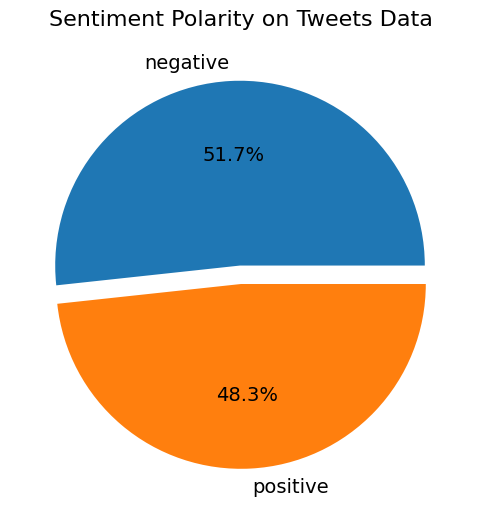

In [ ]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'data_sentiment_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in data_sentiment_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'data_sentiment_df' dan menyimpannya dalam list 'labels'.
labels = list(data_sentiment_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Tweets Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = data_sentiment_df[data_sentiment_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = data_sentiment_df[data_sentiment_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

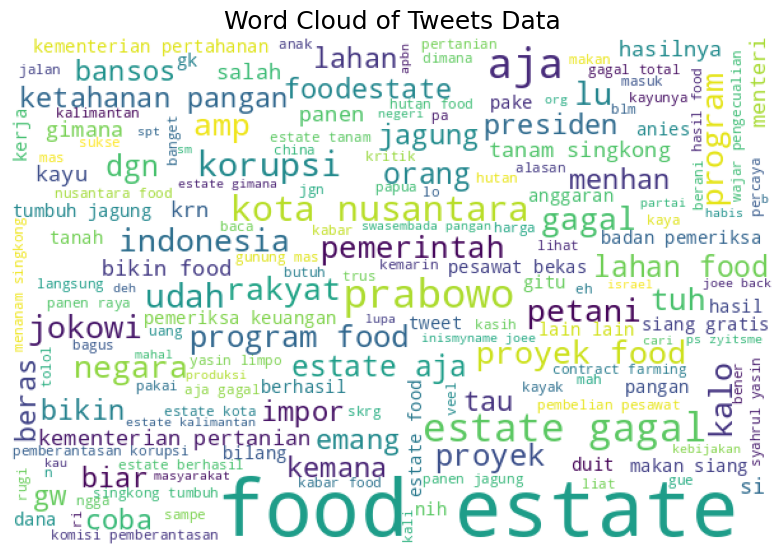

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'data_sentiment_df'.
for tweet in data_sentiment_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

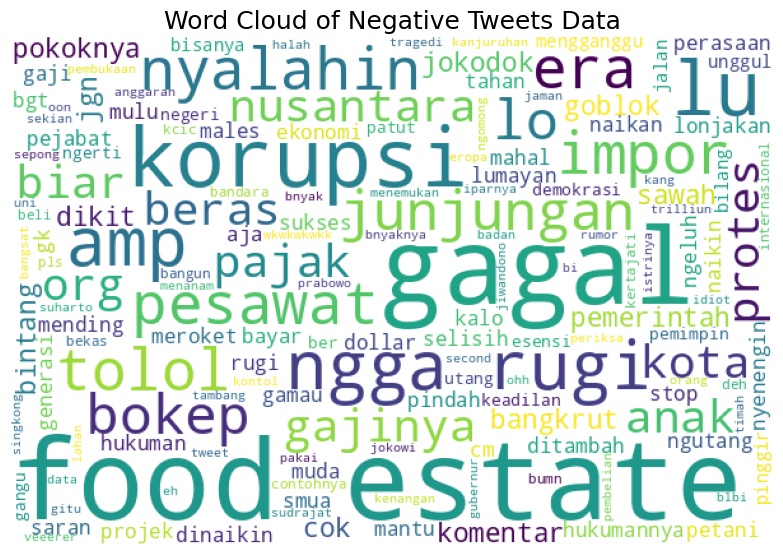

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

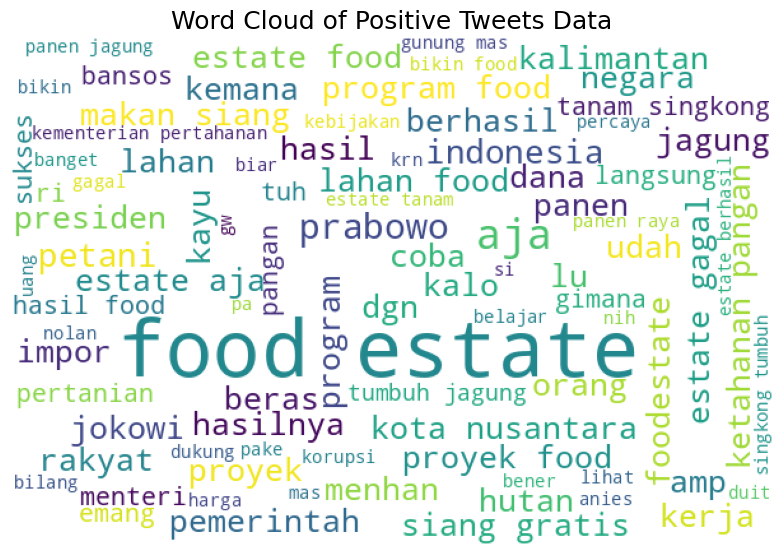

In [ ]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

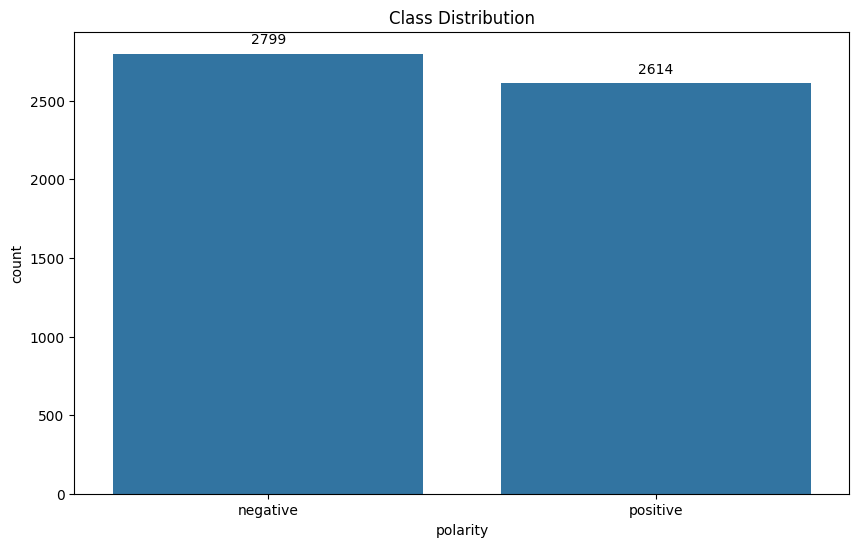

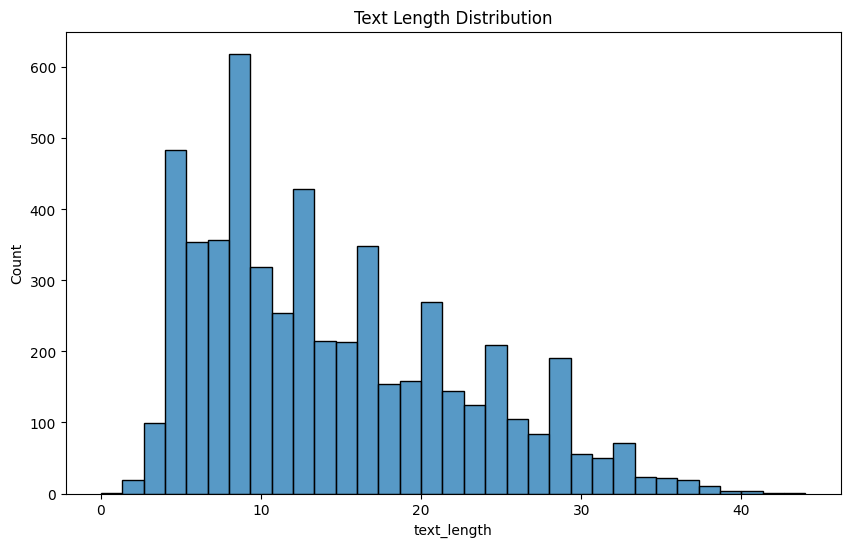

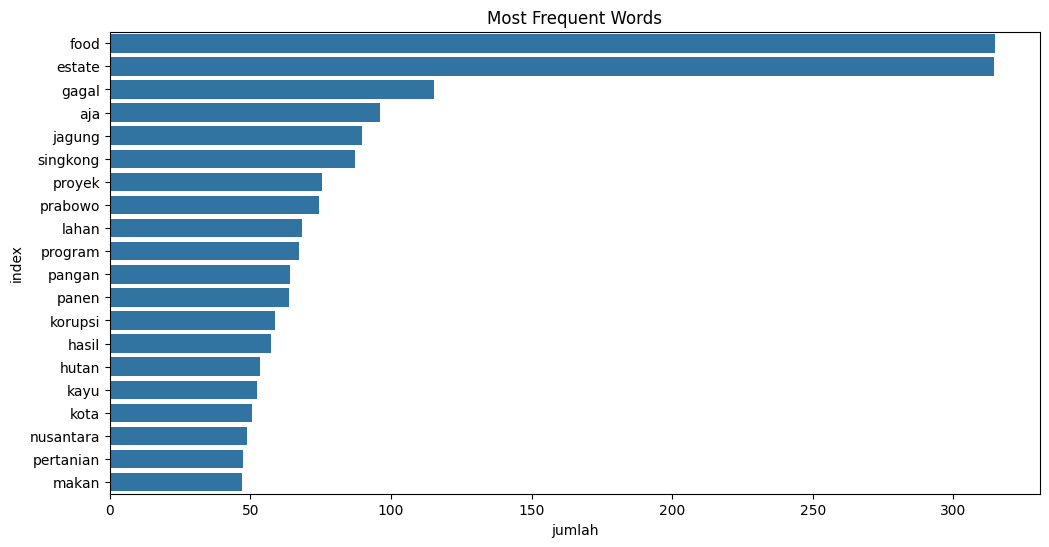

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=data_sentiment_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
data_sentiment_df['text_length'] = data_sentiment_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(data_sentiment_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_sentiment_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

### Data Splitting

In [ ]:
data_sentiment_df.head(2)

,full_text,username,created_at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,Lonie Jgn bikin orang susah katanya laah food estate itu bagaimana Yg udh menghabiskan ber hektar² lahan tapi hasilnya nihil,NaufalAriiq26,Fri Aug 09 23:51:15 +0000 2024,Lonie Jgn bikin orang susah katanya laah food estate itu bagaimana Yg udh menghabiskan ber hektar² lahan tapi hasilnya nihil,lonie jgn bikin orang susah katanya laah food estate itu bagaimana yg udh menghabiskan ber hektar² lahan tapi hasilnya nihil,lonie jgn bikin orang susah katanya laah food estate itu bagaimana yang sudah menghabiskan ber hektar² lahan tapi hasilnya nihil,"[lonie, jgn, bikin, orang, susah, katanya, laah, food, estate, itu, bagaimana, yang, sudah, menghabiskan, ber, hektar², lahan, tapi, hasilnya, nihil]","[lonie, jgn, bikin, orang, susah, laah, food, estate, menghabiskan, ber, hektar², lahan, hasilnya, nihil]",lonie jgn bikin orang susah laah food estate menghabiskan ber hektar² lahan hasilnya nihil,-11,negative,14
1,Mbok ya anda itu jangan asal cuap saya sekeluarga dipastikan memilih PKS dipaksa semua wajib pilih pks karna apa Karna ke istiqomah An nah ini Kok ya gabung dnegan keluarga dinasti belum lagi aroma gabung prabowo yg nyata punya masalah Food estate impor pesawat mana idealis,abi_daawud,Fri Aug 09 13:10:02 +0000 2024,Mbok ya anda itu jangan asal cuap saya sekeluarga dipastikan memilih PKS dipaksa semua wajib pilih pks karna apa Karna ke istiqomah An nah ini Kok ya gabung dnegan keluarga dinasti belum lagi aroma gabung prabowo yg nyata punya masalah Food estate impor pesawat mana idealis,mbok ya anda itu jangan asal cuap saya sekeluarga dipastikan memilih pks dipaksa semua wajib pilih pks karna apa karna ke istiqomah an nah ini kok ya gabung dnegan keluarga dinasti belum lagi aroma gabung prabowo yg nyata punya masalah food estate impor pesawat mana idealis,seharusnya ya anda itu tidak asal cuap saya sekeluarga dipastikan memilih pks dipaksa semua wajib pilih pks karna apa karna ke istiqomah an nah ini kok ya gabung dnegan keluarga dinasti belum lagi aroma gabung prabowo yang nyata punya masalah food estate impor pesawat mana idealis,"[seharusnya, ya, anda, itu, tidak, asal, cuap, saya, sekeluarga, dipastikan, memilih, pks, dipaksa, semua, wajib, pilih, pks, karna, apa, karna, ke, istiqomah, an, nah, ini, kok, ya, gabung, dnegan, keluarga, dinasti, belum, lagi, aroma, gabung, prabowo, yang, nyata, punya, masalah, food, estate, impor, pesawat, mana, idealis]","[cuap, sekeluarga, memilih, pks, dipaksa, wajib, pilih, pks, karna, karna, istiqomah, gabung, dnegan, keluarga, dinasti, aroma, gabung, prabowo, nyata, food, estate, impor, pesawat, idealis]",cuap sekeluarga memilih pks dipaksa wajib pilih pks karna karna istiqomah gabung dnegan keluarga dinasti aroma gabung prabowo nyata food estate impor pesawat idealis,-21,negative,24


In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = data_sentiment_df['text_akhir']
y = data_sentiment_df['polarity']

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,agus,aja,alam,alasan,alutsista,amp,anak,anggaran,anies,apbn,...,tuh,tumbuh,tweet,uang,udah,usut,veel,wajar,yasin,zyitsme
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,0.0,0.730594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5409,0.0,0.261977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.454027,0.0
5410,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.433904,0.0,0.0,0.0,0.000000,0.0
5411,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.588284,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec model
sentences = [text.split() for text in data_sentiment_df['text_akhir']]
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to create document vectors using Word2Vec
def document_vector(doc, model, size):
    doc = [word for word in doc if word in model.wv.key_to_index]
    if not doc:
        return np.zeros(size)
    return np.mean([model.wv[word] for word in doc], axis=0)

# Create document vectors for all documents
X_w2v = np.array([document_vector(doc, model_w2v, 100) for doc in sentences])


# Split the data into training and testing sets (70% training, 30% testing)
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y, test_size=0.1, random_state=42)

### Pemodelan

Naive Bayes dengan TFIDF

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7288031205091356
Naive Bayes - accuracy_test: 0.7177121771217713


Classification Report (Train):
               precision    recall  f1-score   support

    negative       0.79      0.65      0.71      2526
    positive       0.68      0.81      0.74      2345

    accuracy                           0.73      4871
   macro avg       0.74      0.73      0.73      4871
weighted avg       0.74      0.73      0.73      4871

Classification Report (Test):
               precision    recall  f1-score   support

    negative       0.74      0.67      0.71       273
    positive       0.70      0.77      0.73       269

    accuracy                           0.72       542
   macro avg       0.72      0.72      0.72       542
weighted avg       0.72      0.72      0.72       542



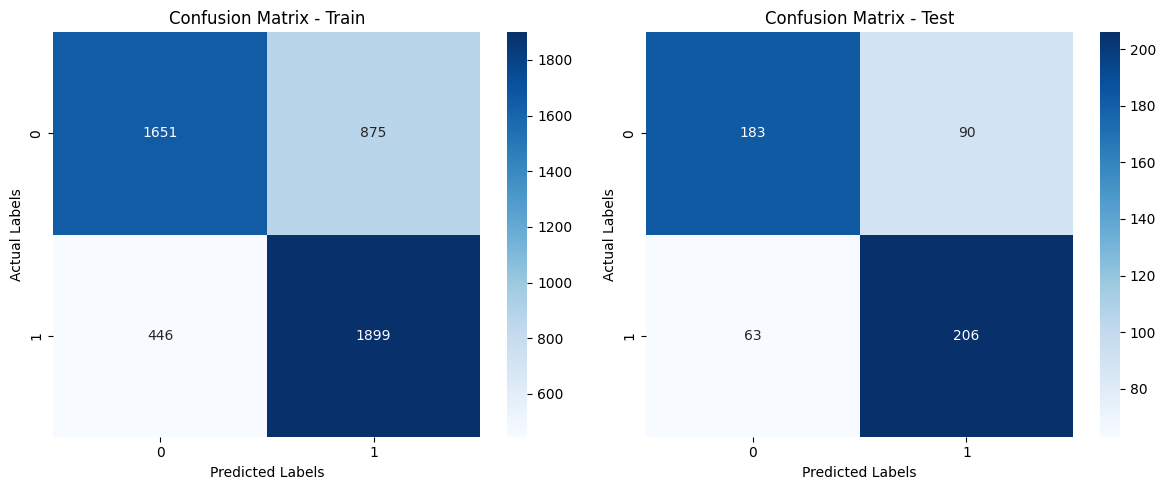

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report untuk data pelatihan
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_nb))

# Classification Report untuk data uji
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test_nb))

# Confusion Matrix untuk data pelatihan
conf_matrix_train = confusion_matrix(y_train, y_pred_train_nb)

# Confusion Matrix untuk data uji
conf_matrix_test = confusion_matrix(y_test, y_pred_test_nb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12,5))

# Confusion Matrix untuk data pelatihan
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Confusion Matrix untuk data uji
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

plt.tight_layout()
plt.show()


### Naive Bayes dengan Word2vec

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membuat objek model Gaussian Naive Bayes
gaussian_nb_w2v = GaussianNB()

# Melatih model Gaussian Naive Bayes pada data pelatihan
gaussian_nb_w2v.fit(X_train_w2v, y_train_w2v)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = gaussian_nb_w2v.predict(X_train_w2v)
y_pred_test_nb = gaussian_nb_w2v.predict(X_test_w2v)

# Evaluasi akurasi model Gaussian Naive Bayes
accuracy_train_nb_w2v = accuracy_score(y_pred_train_nb, y_train_w2v)
accuracy_test_nb_w2v = accuracy_score(y_pred_test_nb, y_test_w2v)

# Menampilkan akurasi
print('Gaussian Naive Bayes - accuracy_train:', accuracy_train_nb_w2v)
print('Gaussian Naive Bayes - accuracy_test:', accuracy_test_nb_w2v)

Gaussian Naive Bayes - accuracy_train: 0.5725723670704167
Gaussian Naive Bayes - accuracy_test: 0.5867158671586716


Classification Report (Train):
               precision    recall  f1-score   support

    negative       0.56      0.77      0.65      2526
    positive       0.59      0.36      0.45      2345

    accuracy                           0.57      4871
   macro avg       0.58      0.56      0.55      4871
weighted avg       0.58      0.57      0.55      4871

Classification Report (Test):
               precision    recall  f1-score   support

    negative       0.56      0.81      0.66       273
    positive       0.65      0.36      0.47       269

    accuracy                           0.59       542
   macro avg       0.61      0.59      0.56       542
weighted avg       0.61      0.59      0.57       542



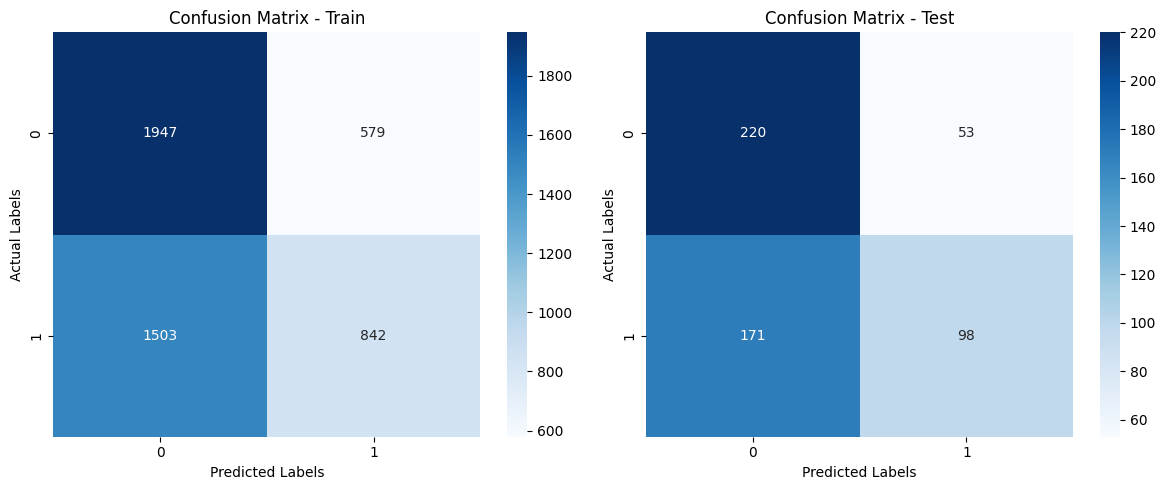

In [ ]:
# Classification Report untuk data pelatihan
print("Classification Report (Train):\n", classification_report(y_train_w2v, y_pred_train_nb))

# Classification Report untuk data uji
print("Classification Report (Test):\n", classification_report(y_test_w2v, y_pred_test_nb))

# Confusion Matrix untuk data pelatihan
conf_matrix_train = confusion_matrix(y_train_w2v, y_pred_train_nb)

# Confusion Matrix untuk data uji
conf_matrix_test = confusion_matrix(y_test_w2v, y_pred_test_nb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12,5))

# Confusion Matrix untuk data pelatihan
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Confusion Matrix untuk data uji
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

plt.tight_layout()
plt.show()


### Logistic regression dengan tfidf

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.7540546089098747
Logistic Regression - accuracy_test: 0.7435424354243543


Classification Report (Train):
               precision    recall  f1-score   support

    negative       0.80      0.70      0.75      2526
    positive       0.72      0.81      0.76      2345

    accuracy                           0.75      4871
   macro avg       0.76      0.76      0.75      4871
weighted avg       0.76      0.75      0.75      4871

Classification Report (Test):
               precision    recall  f1-score   support

    negative       0.76      0.72      0.74       273
    positive       0.73      0.77      0.75       269

    accuracy                           0.74       542
   macro avg       0.74      0.74      0.74       542
weighted avg       0.74      0.74      0.74       542



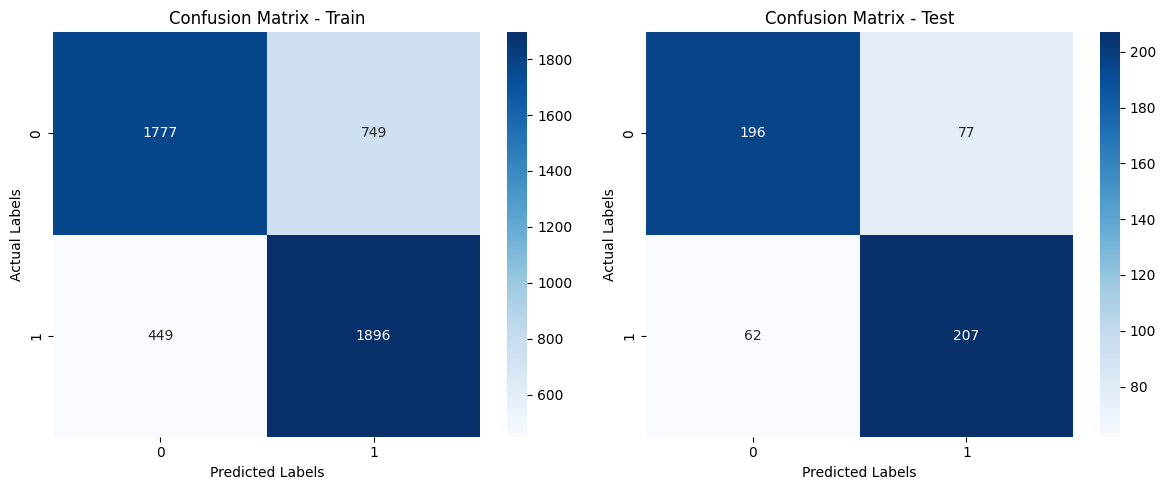

In [ ]:
# Classification Report untuk data pelatihan
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_lr))

# Classification Report untuk data uji
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test_lr))

# Confusion Matrix untuk data pelatihan
conf_matrix_train = confusion_matrix(y_train, y_pred_train_lr)

# Confusion Matrix untuk data uji
conf_matrix_test = confusion_matrix(y_test, y_pred_test_lr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12,5))

# Confusion Matrix untuk data pelatihan
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Confusion Matrix untuk data uji
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

plt.tight_layout()
plt.show()


### Logistic regression dengan word2vec

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membuat objek model Logistic Regression
logistic_regression_w2v = LogisticRegression(max_iter=1000)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_w2v.fit(X_train_w2v, y_train_w2v)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression_w2v.predict(X_train_w2v)
y_pred_test_lr = logistic_regression_w2v.predict(X_test_w2v)

# Evaluasi akurasi model Logistic Regression
accuracy_train_lr_w2v = accuracy_score(y_pred_train_lr, y_train_w2v)
accuracy_test_lr_w2v = accuracy_score(y_pred_test_lr, y_test_w2v)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr_w2v)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_w2v)

Logistic Regression - accuracy_train: 0.6048039416957504
Logistic Regression - accuracy_test: 0.5756457564575646


Classification Report (Train):
               precision    recall  f1-score   support

    negative       0.60      0.74      0.66      2526
    positive       0.62      0.45      0.53      2345

    accuracy                           0.60      4871
   macro avg       0.61      0.60      0.59      4871
weighted avg       0.61      0.60      0.60      4871

Classification Report (Test):
               precision    recall  f1-score   support

    negative       0.56      0.75      0.64       273
    positive       0.61      0.40      0.48       269

    accuracy                           0.58       542
   macro avg       0.58      0.57      0.56       542
weighted avg       0.58      0.58      0.56       542



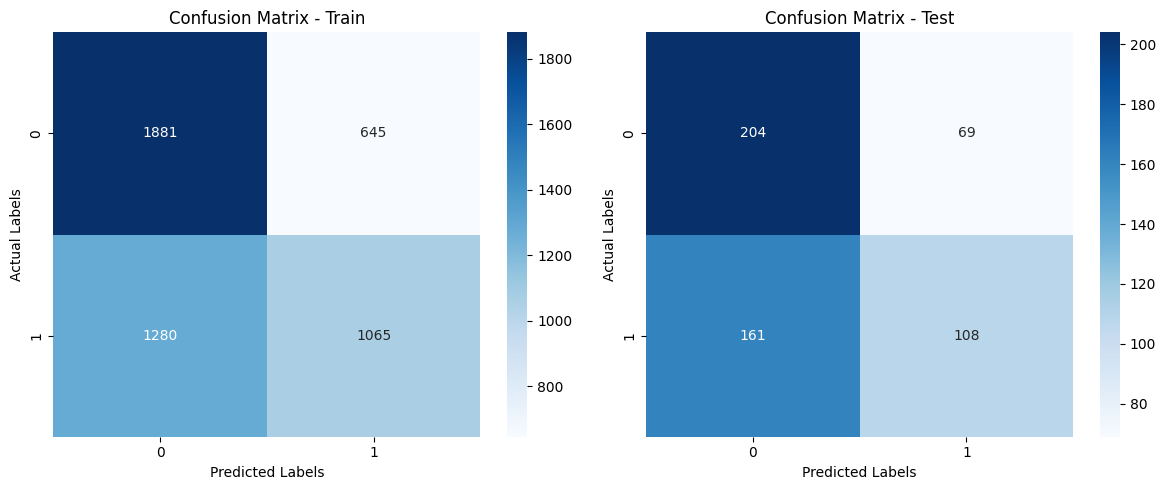

In [ ]:
# Classification Report untuk data pelatihan
print("Classification Report (Train):\n", classification_report(y_train_w2v, y_pred_train_lr))

# Classification Report untuk data uji
print("Classification Report (Test):\n", classification_report(y_test_w2v, y_pred_test_lr))

# Confusion Matrix untuk data pelatihan
conf_matrix_train = confusion_matrix(y_train_w2v, y_pred_train_lr)

# Confusion Matrix untuk data uji
conf_matrix_test = confusion_matrix(y_test_w2v, y_pred_test_lr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12,5))

# Confusion Matrix untuk data pelatihan
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Confusion Matrix untuk data uji
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

plt.tight_layout()
plt.show()


### Pemodelan Support Vector Machine dengan tfidf

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Membuat objek model SVM dengan kernel linear
svm_model_linear = SVC(kernel='linear')

# Melatih model SVM pada data pelatihan
svm_model_linear.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm_linear = svm_model_linear.predict(X_train.toarray())
y_pred_test_svm_linear = svm_model_linear.predict(X_test.toarray())

# Evaluasi akurasi model SVM pada data pelatihan
accuracy_train_svm_linear = accuracy_score(y_pred_train_svm_linear, y_train)

# Evaluasi akurasi model SVM pada data uji
accuracy_test_svm_linear = accuracy_score(y_pred_test_svm_linear, y_test)

# Menampilkan akurasi
print('SVM (Linear Kernel) - accuracy_train:', accuracy_train_svm_linear)
print('SVM (Linear Kernel) - accuracy_test:', accuracy_test_svm_linear)

SVM (Linear Kernel) - accuracy_train: 0.7520016423732293
SVM (Linear Kernel) - accuracy_test: 0.7287822878228782


Classification Report (Train):
               precision    recall  f1-score   support

    negative       0.81      0.68      0.74      2526
    positive       0.71      0.83      0.76      2345

    accuracy                           0.75      4871
   macro avg       0.76      0.75      0.75      4871
weighted avg       0.76      0.75      0.75      4871

Classification Report (Test):
               precision    recall  f1-score   support

    negative       0.76      0.67      0.71       273
    positive       0.70      0.79      0.74       269

    accuracy                           0.73       542
   macro avg       0.73      0.73      0.73       542
weighted avg       0.73      0.73      0.73       542



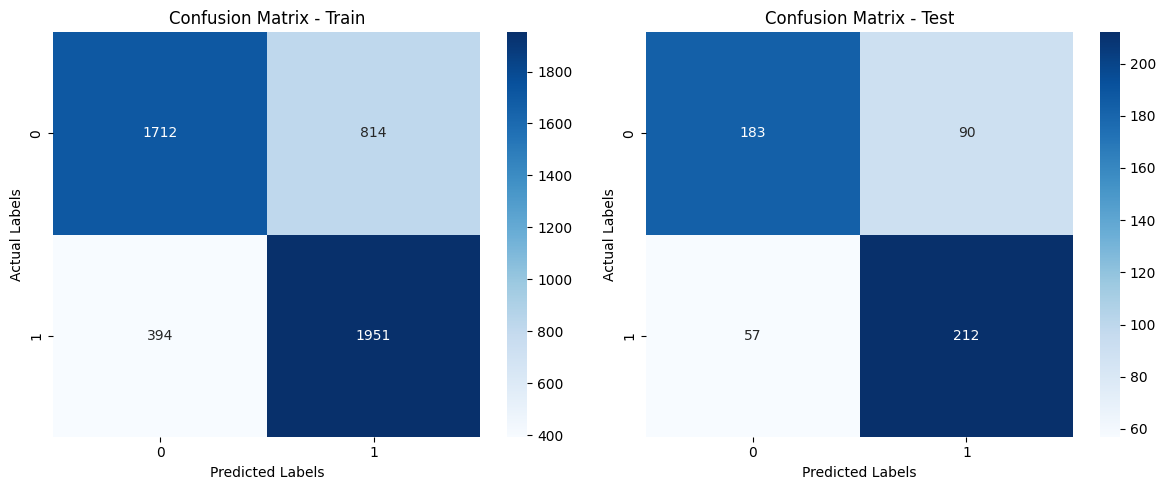

In [ ]:
# Classification Report untuk data pelatihan
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_svm_linear))

# Classification Report untuk data uji
print("Classification Report (Test):\n", classification_report(y_test, y_pred_test_svm_linear))

# Confusion Matrix untuk data pelatihan
conf_matrix_train = confusion_matrix(y_train, y_pred_train_svm_linear)

# Confusion Matrix untuk data uji
conf_matrix_test = confusion_matrix(y_test, y_pred_test_svm_linear)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12,5))

# Confusion Matrix untuk data pelatihan
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Confusion Matrix untuk data uji
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Membuat objek model SVM dengan kernel linear
svm_model_linear_w2v = SVC(kernel='linear')

# Melatih model SVM pada data pelatihan berbasis Word2Vec
svm_model_linear_w2v.fit(X_train_w2v, y_train_w2v)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm_linear_w2v = svm_model_linear_w2v.predict(X_train_w2v)
y_pred_test_svm_linear_w2v = svm_model_linear_w2v.predict(X_test_w2v)

# Evaluasi akurasi model SVM pada data pelatihan
accuracy_train_svm_linear_w2v = accuracy_score(y_pred_train_svm_linear_w2v, y_train_w2v)

# Evaluasi akurasi model SVM pada data uji
accuracy_test_svm_linear_w2v = accuracy_score(y_pred_test_svm_linear_w2v, y_test_w2v)

# Menampilkan akurasi
print('SVM (Linear Kernel) with Word2Vec - accuracy_train:', accuracy_train_svm_linear_w2v)
print('SVM (Linear Kernel) with Word2Vec - accuracy_test:', accuracy_test_svm_linear_w2v)

SVM (Linear Kernel) with Word2Vec - accuracy_train: 0.603161568466434
SVM (Linear Kernel) with Word2Vec - accuracy_test: 0.5977859778597786


Classification Report (Train):
               precision    recall  f1-score   support

    negative       0.58      0.84      0.69      2526
    positive       0.67      0.34      0.46      2345

    accuracy                           0.60      4871
   macro avg       0.63      0.59      0.57      4871
weighted avg       0.62      0.60      0.58      4871

Classification Report (Test):
               precision    recall  f1-score   support

    negative       0.57      0.86      0.68       273
    positive       0.70      0.33      0.45       269

    accuracy                           0.60       542
   macro avg       0.63      0.60      0.57       542
weighted avg       0.63      0.60      0.57       542



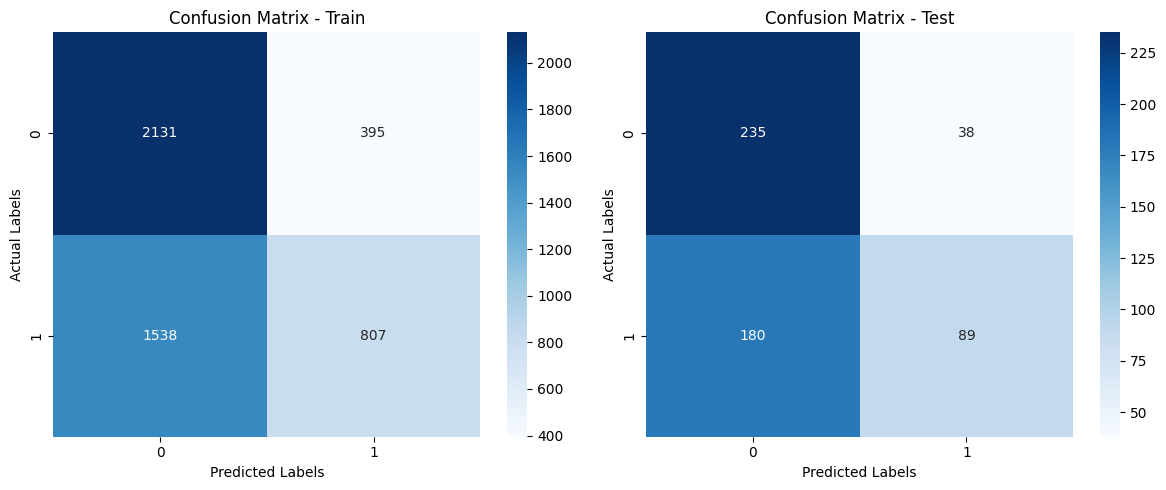

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report untuk data pelatihan
print("Classification Report (Train):\n", classification_report(y_train_w2v, y_pred_train_svm_linear_w2v))

# Classification Report untuk data uji
print("Classification Report (Test):\n", classification_report(y_test_w2v, y_pred_test_svm_linear_w2v))

# Confusion Matrix untuk data pelatihan
conf_matrix_train = confusion_matrix(y_train_w2v, y_pred_train_svm_linear_w2v)

# Confusion Matrix untuk data uji
conf_matrix_test = confusion_matrix(y_test_w2v, y_pred_test_svm_linear_w2v)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12,5))

# Confusion Matrix untuk data pelatihan
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

# Confusion Matrix untuk data uji
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

plt.tight_layout()
plt.show()
